# END TO END CLASSIFICATION MODEL PREDICTING WHETHER SOMEONE SURVIVES THE TITANIC OR NOT.

# 1. Problem Definition
> There is a dataset on some people who were on the titanic boat many years ago. With this data one can predict whether someone survives the titanic or not. This project hopes to solve this problem, by building a classifictation machine learning algorithm which predicts whether someone survives the titatnic or not.  

# 2. Data
> Our data is provided by Kaggle. A machine learning and data science organization. Our data set consists of training, validation and testing datasets.

# 3. Evaluation
> Ou model is said to be "perfect" when it reaches 98% in accuraccy after evaluation and tuning of the baseline model.

# 4. Feature Dictionary
Our data has 12 attributes. The training data has 12 columns and 891 rows. The test data has 11 columns, 419 rows.

The following features are in our data:

1. PassengerID: The passenger column is the number of passengers.
2. Survived: This column is a column of 0s and 1s. 1 means survived and 0 means did not survive.
3. Pclass: 
4. Name: Name is the column for the names of the pasesengers.
5. Sex: The sex column indicates whether he passengers are males or females.
6. Age: The age column indicates the age of the passengers.
7. Sibsp:
8. Parch:
9. Ticket: This column indicates the column number.
10. Fare: 
11. Cabin: This indicates the cabin number.
12. Embarked:

## Preparing our work tools:

In [17]:
# Import numpy, matplotlib, pandas, scikit learn libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Show plot in jupyter notebook
%matplotlib inline

# Import our algorithm from sklearn
from sklearn.linear_model import LogisticRegression

# Import our model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert test data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### Let us do some Exploratory Data Analysis of our data.

In [18]:
df = pd.read_csv("Dataset/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

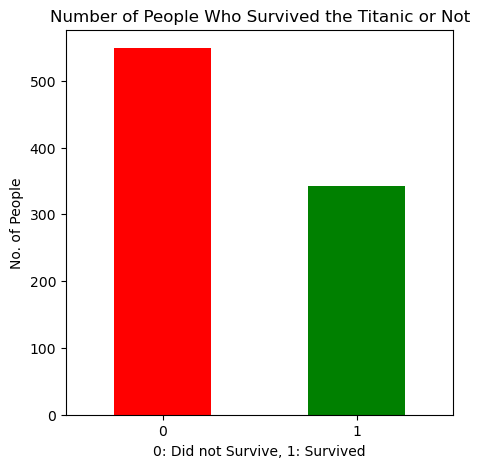

In [23]:
# Visualize the Survived column to see who survived or not
df.Survived.value_counts().plot(kind="bar", figsize=(5,5), color=["red", "green"])

plt.title("Number of People Who Survived the Titanic or Not")
plt.ylabel("No. of People")
plt.xlabel("0: Did not Survive, 1: Survived")
plt.xticks(rotation=0);

In [24]:
pd.crosstab(df.Survived, df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


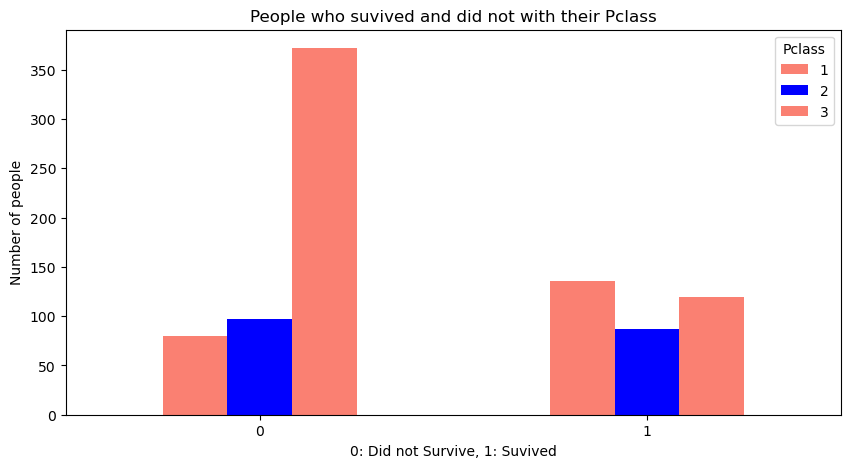

In [25]:
# Visualize the Survived column, and the Pclass column
pd.crosstab(df.Survived, df.Pclass).plot(kind="bar", figsize=(10,5), color=["salmon", "blue"])

plt.title("People who suvived and did not with their Pclass")
plt.xlabel("0: Did not Survive, 1: Suvived")
plt.ylabel("Number of people")
plt.xticks(rotation=0);

## Filling the missing values and convert our data into numbers to prepae it for our model

In [26]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
label = df.values
content = df.keys

def fill_missing_values(label, content):
    
    """
    This function fill missing values of any 'float' column by loopong through any given dataframe.
    """
    print("Filling missing values with a boolean...")
    
    for label, content in df.items():
        if pd.api.types.is_float_dtype(content):
            df[label+'missing']=pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
    
    return df[label]

In [28]:
fill_missing_values(label, content)

Filling missing values with a boolean...


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [29]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Agemissing       0
Faremissing      0
dtype: int64

In [30]:
def fill_missing_object_values(label, content):
    
    """
    This function fill missing values of any 'object' column by loopong through any given dataframe.
    """
    print("Filling missing values with a boolean...")
    
    for label, content in df.items():
        if pd.api.types.is_object_dtype(content):
            df[label+'missing']=pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
    
    return df[label]

In [31]:
fill_missing_object_values(label, content)

Filling missing values with a boolean...


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Faremissing, Length: 891, dtype: bool

In [32]:
df.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
Agemissing         0
Faremissing        0
Namemissing        0
Sexmissing         0
Ticketmissing      0
Cabinmissing       0
Embarkedmissing    0
dtype: int64

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agemissing,Faremissing,Namemissing,Sexmissing,Ticketmissing,Cabinmissing,Embarkedmissing
0,1,0,3,109,2,29,1,0,524,19,0,3,False,False,False,False,False,True,False
1,2,1,1,191,1,52,1,0,597,208,82,1,False,False,False,False,False,False,False
2,3,1,3,354,1,35,0,0,670,42,0,3,False,False,False,False,False,True,False
3,4,1,1,273,1,48,1,0,50,190,56,3,False,False,False,False,False,False,False
4,5,0,3,16,2,48,0,0,473,44,0,3,False,False,False,False,False,True,False


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PassengerId      891 non-null    int64
 1   Survived         891 non-null    int64
 2   Pclass           891 non-null    int64
 3   Name             891 non-null    int16
 4   Sex              891 non-null    int8 
 5   Age              891 non-null    int8 
 6   SibSp            891 non-null    int64
 7   Parch            891 non-null    int64
 8   Ticket           891 non-null    int16
 9   Fare             891 non-null    int16
 10  Cabin            891 non-null    int16
 11  Embarked         891 non-null    int8 
 12  Agemissing       891 non-null    bool 
 13  Faremissing      891 non-null    bool 
 14  Namemissing      891 non-null    bool 
 15  Sexmissing       891 non-null    bool 
 16  Ticketmissing    891 non-null    bool 
 17  Cabinmissing     891 non-null    bool 
 18  Embarkedmi

### Drop new columns created with missing values

In [35]:
df.drop(["Agemissing", "Faremissing", "Namemissing", "Sexmissing", "Ticketmissing", "Cabinmissing", "Embarkedmissing"], 
        axis=1, inplace=True)

In [36]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Name         891 non-null    int16
 4   Sex          891 non-null    int8 
 5   Age          891 non-null    int8 
 6   SibSp        891 non-null    int64
 7   Parch        891 non-null    int64
 8   Ticket       891 non-null    int16
 9   Fare         891 non-null    int16
 10  Cabin        891 non-null    int16
 11  Embarked     891 non-null    int8 
dtypes: int16(4), int64(5), int8(3)
memory usage: 44.5 KB


In [38]:
df.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Name           int16
Sex             int8
Age             int8
SibSp          int64
Parch          int64
Ticket         int16
Fare           int16
Cabin          int16
Embarked        int8
dtype: object

In [39]:
df.to_csv("Dataset/modified-training-data")

In [40]:
df_tmp = df.copy()
df_tmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,109,2,29,1,0,524,19,0,3
1,2,1,1,191,1,52,1,0,597,208,82,1
2,3,1,3,354,1,35,0,0,670,42,0,3
3,4,1,1,273,1,48,1,0,50,190,56,3
4,5,0,3,16,2,48,0,0,473,44,0,3


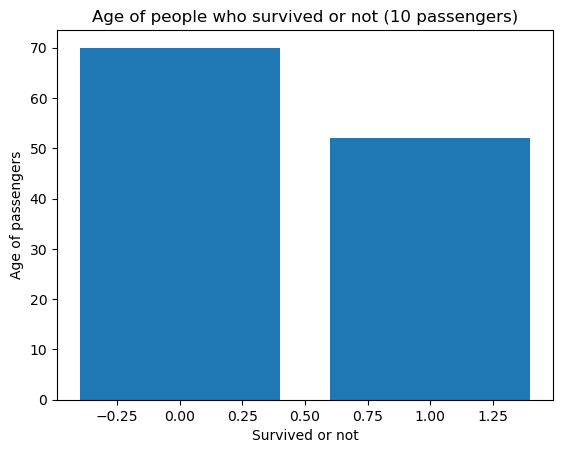

In [41]:
fig, ax = plt.subplots()

ax.bar(df["Survived"][:10], df["Age"][:10])
ax.set(title="Age of people who survived or not (10 passengers)", xlabel="Survived or not", 
       ylabel="Age of passengers");

## Modelling and Experimentation

We are going to fit our data to Logistic Regression model and see how our model performs with our data.

In [42]:
# Spliting our data into X (the data column) and y (the target column)
X = df_tmp.drop("Survived", axis=1)
y = df_tmp["Survived"]

#Spliting our data into train, validation

X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                     y,
                                                     test_size=0.2)

In [43]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((712, 11), (712,), (179, 11), (179,))

In [44]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,109,2,29,1,0,524,19,0,3
1,2,1,191,1,52,1,0,597,208,82,1
2,3,3,354,1,35,0,0,670,42,0,3
3,4,1,273,1,48,1,0,50,190,56,3
4,5,3,16,2,48,0,0,473,44,0,3


In [45]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Fitting the data to our model

In [46]:
# Defining our model
model = LogisticRegression()

In [47]:
model.fit(X_train, y_train)

C:\Users\hp\Documents\heart-disease-ml-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
model.score(X_train, y_train)

0.7879213483146067

In [49]:
model.score(X_valid, y_valid)

0.7932960893854749

### Hyperparameter Tuning with RandomizedSearchCV and GridSearchCV

In [50]:
# listing the dofferent arguments our models will receive
log_reg = {"C": np.logspace(-4, 4, 20),
          "solver":["liblinear"]}

In [51]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [59]:
model1 = rs_log_reg.score(X_train, y_train)

In [53]:
rs_log_reg.score(X_valid, y_valid)

0.8100558659217877

In [54]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [55]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
          "solver":["liblinear"]}

np.random.seed(42)

gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [60]:
model2 = gs_log_reg.score(X_train, y_train)

In [57]:
gs_log_reg.best_params_

{'C': 29.763514416313132, 'solver': 'liblinear'}

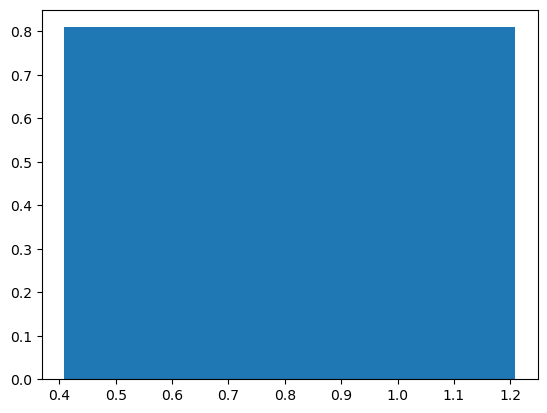

In [62]:
# Visualize the 2 tuning output scores

fig, ax = plt.subplots()

ax.bar(model1, model2);

In [63]:
ideal_model = LogisticRegression(C=29.763514416313132,
                                solver='liblinear')

In [64]:
ideal_model.fit(X, y)

LogisticRegression(C=29.763514416313132, solver='liblinear')

In [65]:
ideal_model.score(X, y)

0.8047138047138047

## Evaluating our model and seeing how to improve it

**Let's do the following:**
1. Plot the consufion report
2. Create the cross validation report
3. Precision score
4. Recall Score
5. F1 score
6. Feature importance

In [66]:
#plot the confusion matrix
y_preds = ideal_model.predict(X_valid)

In [67]:
confusion_matrix = metrics.confusion_matrix(y_valid, y_preds)
confusion_matrix

array([[92, 15],
       [19, 53]], dtype=int64)

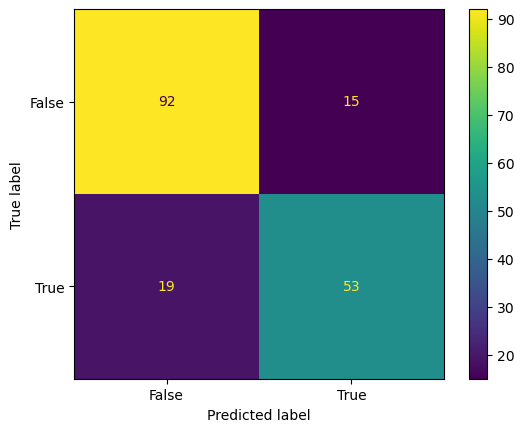

In [68]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                           display_labels=[False, True])
cm_display.plot()
plt.show()

In [69]:
##Get the cross-validation report accuracy score

cv_acc = cross_val_score(ideal_model,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)

In [70]:
##Get the cross-validation report for precision score

cv_prec = cross_val_score(ideal_model,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_prec = np.mean(cv_acc)

In [71]:
##Get the cross-validation report for recall score

cv_recall = cross_val_score(ideal_model,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_acc)

In [72]:
##Get the cross-validation report for f1 score

cv_f1 = cross_val_score(ideal_model,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_acc)

In [73]:
## Let's visualize the report scores

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision Score": cv_prec,
                          "Recall Score": cv_recall,
                          "F1 Score": cv_f1},
                         index=[0])

In [74]:
cv_metrics

,Accuracy,Precision Score,Recall Score,F1 Score
0,0.791231,0.791231,0.791231,0.791231


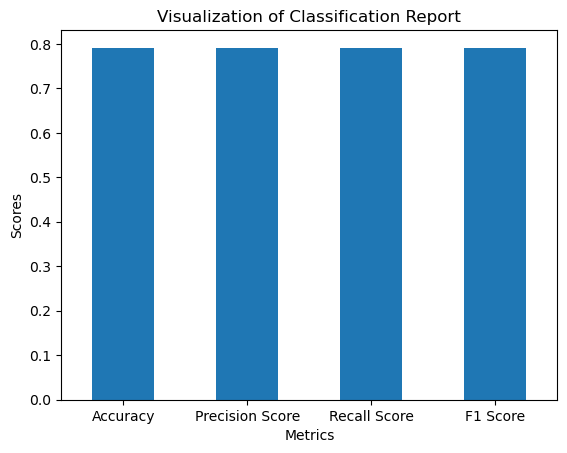

In [75]:
cv_metrics.T.plot(kind="bar", legend=False)
plt.title("Visualization of Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.xticks(rotation=0);

In [76]:
#Feature importance
ideal_model.coef_

array([[ 1.25195796e-04, -3.79863404e-01, -5.75411625e-04,
        -2.68051867e+00, -1.22194906e-02, -4.10828796e-01,
        -1.77660172e-01, -8.43842262e-04,  6.93851402e-03,
         7.11611831e-03, -1.66076714e-01]])

In [77]:
features_dict = dict(zip(df_tmp.columns, list(ideal_model.coef_[0])))
features_dict

{'PassengerId': 0.00012519579646682103,
 'Survived': -0.37986340397492113,
 'Pclass': -0.0005754116250006771,
 'Name': -2.680518665531603,
 'Sex': -0.012219490597491002,
 'Age': -0.4108287959758067,
 'SibSp': -0.17766017185017555,
 'Parch': -0.0008438422617972033,
 'Ticket': 0.006938514022084445,
 'Fare': 0.0071161183114525,
 'Cabin': -0.1660767135250172}

In [78]:
features_df = pd.DataFrame(features_dict, index=[1])

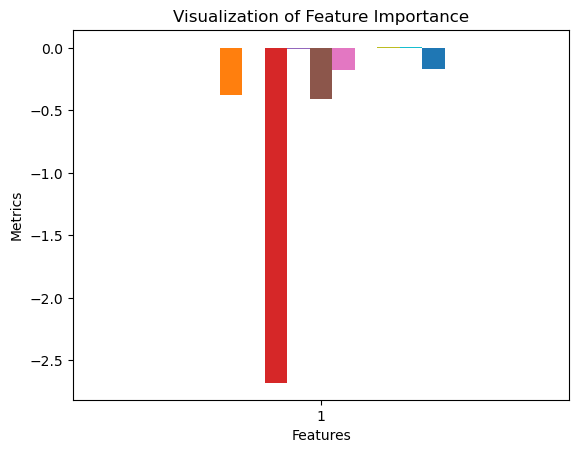

In [79]:
features_df.plot(kind="bar", legend=False)
plt.title("Visualization of Feature Importance")
plt.xlabel("Features")
plt.ylabel("Metrics")
plt.xticks(rotation=0);

In [80]:
test_df = pd.read_csv("Dataset/test.csv")

In [81]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Name         891 non-null    int16
 4   Sex          891 non-null    int8 
 5   Age          891 non-null    int8 
 6   SibSp        891 non-null    int64
 7   Parch        891 non-null    int64
 8   Ticket       891 non-null    int16
 9   Fare         891 non-null    int16
 10  Cabin        891 non-null    int16
 11  Embarked     891 non-null    int8 
dtypes: int16(4), int64(5), int8(3)
memory usage: 44.5 KB


In [89]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [83]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [84]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [90]:
def fill_missing_values(label, content):
    
    """
    This function fill missing values of any 'float' column by loopong through any given dataframe.
    """
    print("Filling missing values with a boolean...")
    
    for label, content in test_df.items():
        if pd.api.types.is_float_dtype(content):
            test_df[label+'missing']=pd.isnull(content)
            test_df[label] = pd.Categorical(content).codes+1
    
    return test_df[label]

In [91]:
fill_missing_values(label, content)

Filling missing values with a boolean...


0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [93]:
def fill_missing_object_values(label, content):
    
    """
    This function fill missing values of any 'object' column by loopong through any given dataframe.
    """
    print("Filling missing values with a boolean...")
    
    for label, content in test_df.items():
        if pd.api.types.is_object_dtype(content):
            test_df[label+'missing']=pd.isnull(content)
            test_df[label] = pd.Categorical(content).codes+1
    
    return test_df[label]

In [94]:
fill_missing_object_values(label, content)

Filling missing values with a boolean...


0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Faremissing, Length: 418, dtype: bool

In [95]:
test_df.isna().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
Agemissing         0
Faremissing        0
Namemissing        0
Sexmissing         0
Ticketmissing      0
Cabinmissing       0
Embarkedmissing    0
dtype: int64

In [96]:
test_df.drop(["Agemissing", "Faremissing", "Namemissing", "Sexmissing", "Ticketmissing", "Cabinmissing", "Embarkedmissing"], 
        axis=1, inplace=True)

In [97]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,207,2,45,0,0,153,25,0,2
1,893,3,404,1,61,1,0,222,6,0,3
2,894,2,270,2,75,0,0,74,42,0,2
3,895,3,409,2,35,0,0,148,35,0,3
4,896,3,179,1,28,1,1,139,47,0,3
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,2,0,0,0,268,32,0,3
414,1306,1,284,1,52,0,0,325,155,23,1
415,1307,3,333,2,51,0,0,347,10,0,3
416,1308,3,385,2,0,0,0,221,32,0,3


In [98]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Name         418 non-null    int16
 3   Sex          418 non-null    int8 
 4   Age          418 non-null    int8 
 5   SibSp        418 non-null    int64
 6   Parch        418 non-null    int64
 7   Ticket       418 non-null    int16
 8   Fare         418 non-null    int16
 9   Cabin        418 non-null    int8 
 10  Embarked     418 non-null    int8 
dtypes: int16(3), int64(4), int8(4)
memory usage: 17.3 KB


In [99]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [101]:
predictions = ideal_model.predict(test_df)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [103]:
predictions.shape

(418,)

In [116]:
results = dict(zip(test_df.PassengerId, list(predictions)))
results

{892: 0,
 893: 0,
 894: 0,
 895: 0,
 896: 1,
 897: 0,
 898: 1,
 899: 0,
 900: 1,
 901: 0,
 902: 0,
 903: 0,
 904: 1,
 905: 0,
 906: 1,
 907: 1,
 908: 0,
 909: 0,
 910: 1,
 911: 1,
 912: 0,
 913: 0,
 914: 1,
 915: 0,
 916: 1,
 917: 0,
 918: 1,
 919: 0,
 920: 0,
 921: 0,
 922: 0,
 923: 0,
 924: 1,
 925: 1,
 926: 0,
 927: 0,
 928: 1,
 929: 1,
 930: 0,
 931: 0,
 932: 0,
 933: 1,
 934: 0,
 935: 1,
 936: 1,
 937: 0,
 938: 0,
 939: 0,
 940: 1,
 941: 1,
 942: 0,
 943: 0,
 944: 1,
 945: 1,
 946: 0,
 947: 0,
 948: 0,
 949: 0,
 950: 0,
 951: 1,
 952: 0,
 953: 0,
 954: 0,
 955: 1,
 956: 0,
 957: 1,
 958: 1,
 959: 0,
 960: 0,
 961: 1,
 962: 1,
 963: 0,
 964: 1,
 965: 0,
 966: 1,
 967: 1,
 968: 0,
 969: 1,
 970: 0,
 971: 1,
 972: 0,
 973: 0,
 974: 0,
 975: 0,
 976: 0,
 977: 0,
 978: 1,
 979: 1,
 980: 1,
 981: 0,
 982: 1,
 983: 0,
 984: 1,
 985: 0,
 986: 0,
 987: 0,
 988: 1,
 989: 0,
 990: 1,
 991: 0,
 992: 1,
 993: 0,
 994: 0,
 995: 0,
 996: 1,
 997: 0,
 998: 0,
 999: 0,
 1000: 0,
 1001: 0,
 1002: 0

In [118]:
results_csv = pd.DataFrame(results, index=[1])

In [130]:
results = results_csv.T
results

,1
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
1308,0


In [131]:
results.to_csv("Dataset/predictions.csv")

In [133]:
results = pd.read_csv("Dataset/predictions.csv")
results.head()

,Unnamed: 0,1
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [137]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  418 non-null    int64
 1   1           418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [145]:
results.rename(columns = {'Unnamed: 0':'PassengerId'}, inplace = True)
results.rename(columns = {'1':'Survived'}, inplace = True)

In [146]:
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [147]:
results.to_csv("Dataset/prediction.csv")

In [148]:
predictions = pd.read_csv("Dataset/prediction.csv")

In [150]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   418 non-null    int64
 1   PassengerId  418 non-null    int64
 2   Survived     418 non-null    int64
dtypes: int64(3)
memory usage: 9.9 KB
